# Code an MLPs neural network into python class from Scratch

## The Description

Neural Network is a type of ML algorithm that is loosely based on the structure and function of the human brain. It consists of layers of interconnected nodes or neurons that process information and make predictions based on input data. For example, in image recognition, "Neural network" might learn to identify images of cats by analyzing example images that have been manually labeled as cats"

Multi-Layer Perceptrons (MLPs) are a type of feedforward artificial neural network that consists of multiple layers of interconnected nodes or neurons. MLP has at least three layers: input layer, hidden layers and output layer. MLP are trained using a supervised learning technique called backpropagation, which adjusts the weights of the connections between nodes to minimize the error. MLP can be used for barious tasks such as classification and regression. The algorithm consists the following steps:
* Forward Pass- Input is passed through the network to compute the predicted output. Weighted sum of inputs is calculated and activation function is applied.
    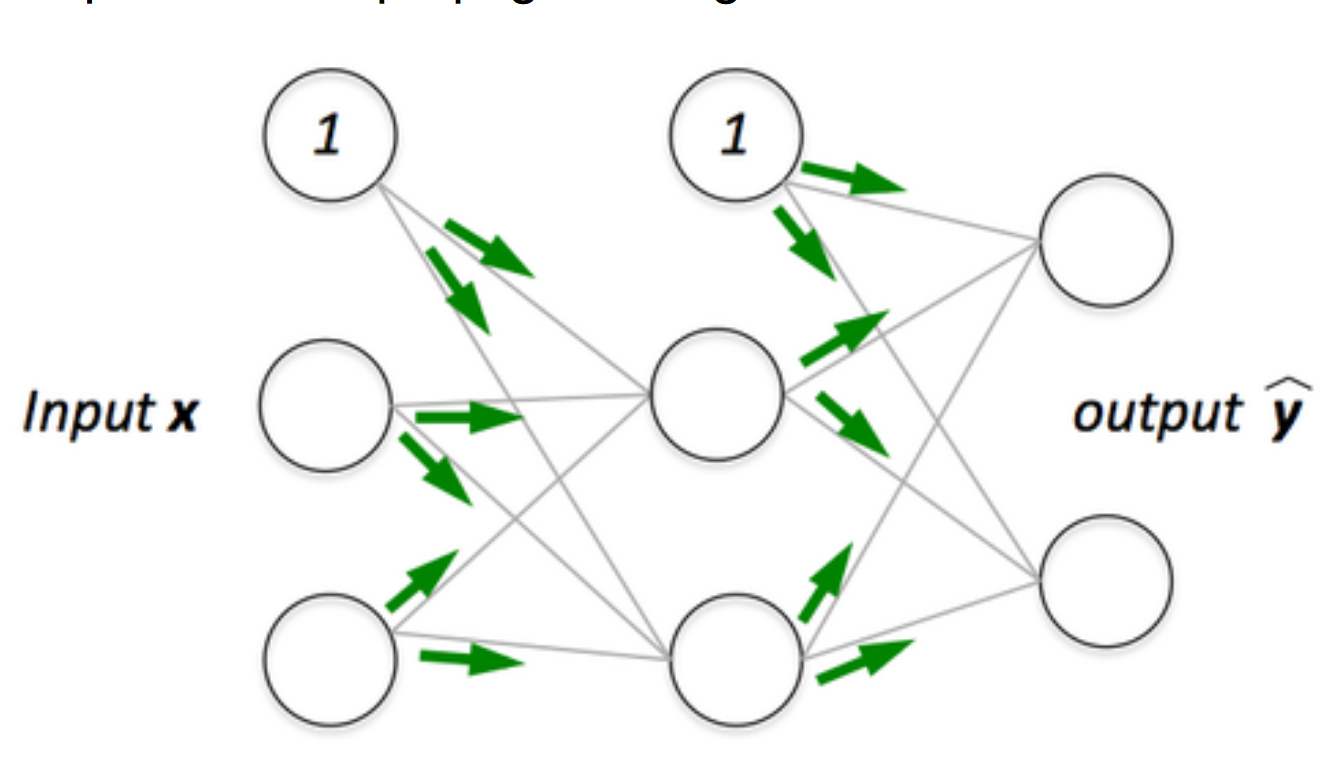
* Compute the error- The error between the predicted output and actual output is calculated using loss function

* Backward Pass- The error is propagated backward through the network, starting from the output layer. 
  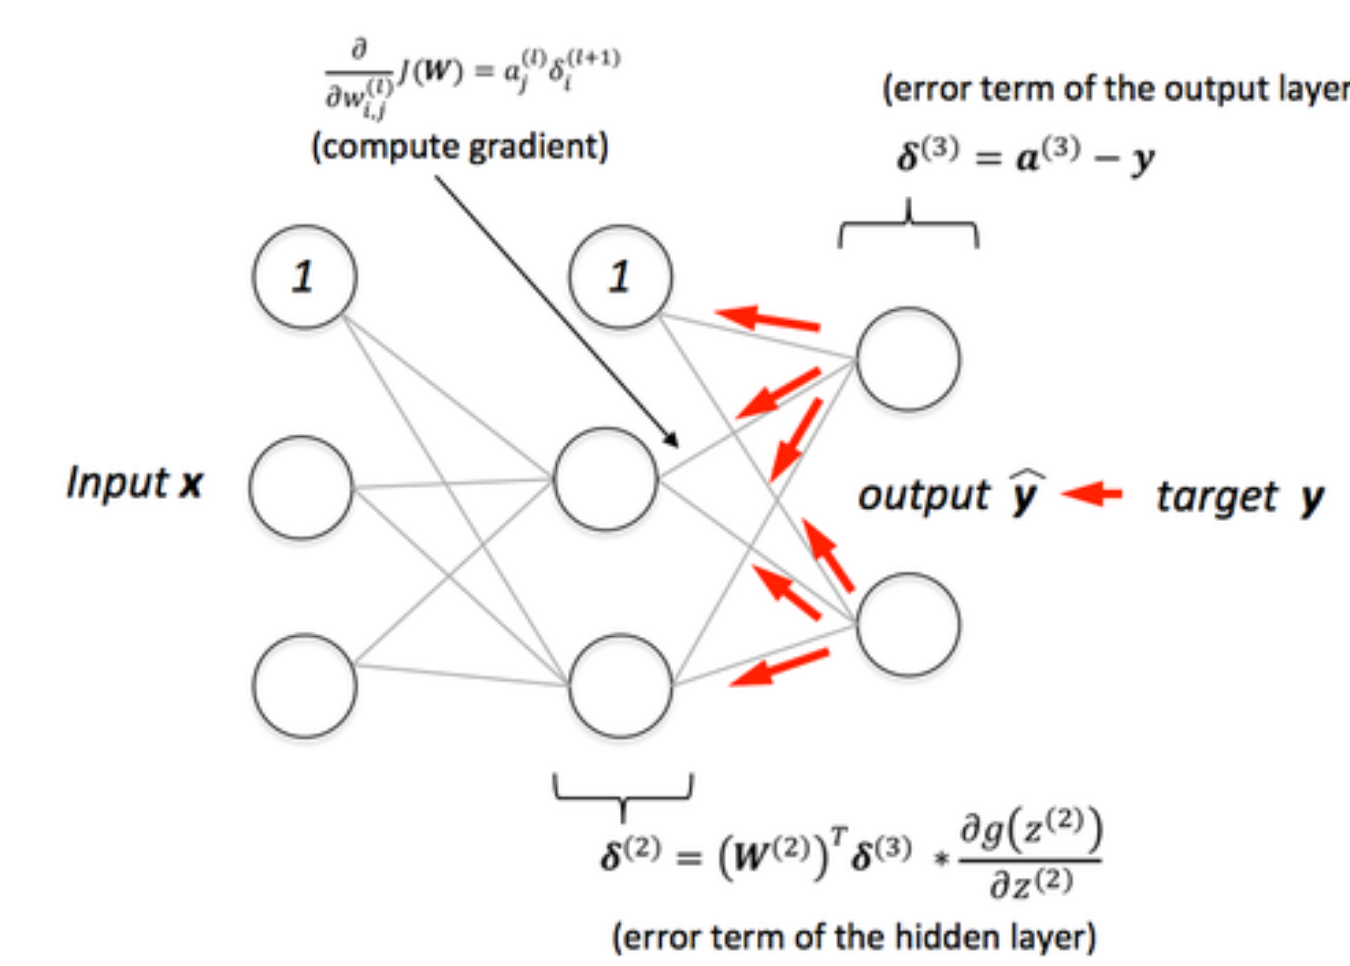
 
* Update the weights: The weights are updated using the computed gradients and a learning rate. 

## Using datasets to test my model

We will use the popular iris dataset of the sklearn.datasets for testing and comparison purpose. We will create MLP class from scractch and then compare its performance with MLP implementation of the scikit-library. 
Note: For The MLP class, see the appendix.[Link to section](#code)

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

#load dataset
iris = load_iris()
X = iris.data
y = iris.target

print(X.shape, y.shape)
print("Analysis of the iris dataset")
print(iris['DESCR'])

(150, 4) (150,)
Analysis of the iris dataset
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    =====

In [7]:
import pandas as pd
data = pd.DataFrame(X, y)
data.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2


Text(0, 0.5, 'sepal width (cm)')

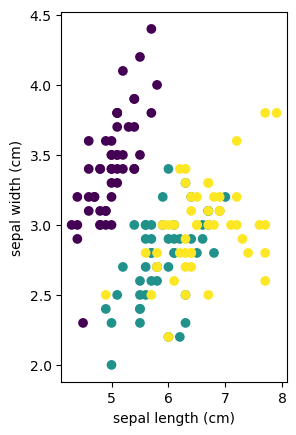

In [9]:
#plot the datasets using matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c = y, cmap=cm.viridis)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])


In [10]:
#preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#train MLP from scratch 
model = MLP_Suman(X_train, y_train, X_test, y_test, L=1, N_L=128)
model.fit(batch_size=8, epochs=10, lr=1)

#train MLP using sklearn
sklearn_model = MLPClassifier(hidden_layer_sizes = (5,), activation='relu', solver ='lbfgs', random_state=0, max_iter=10000)
sklearn_model.fit(X_train, y_train)

#print accuracy of both models
print()
print("training accuracy for Sklearn MLP: ", sklearn_model.score(X_train, y_train))
print("testing accuracy for Sklearn MLP: ", sklearn_model.score(X_test, y_test))
print()







Epoch 1: '(Training)'loss = 2.29---> accuracy = 0.154---------------->'(Testing)'val_loss =1.821--> val_accuracy = 0.244--->train_time = 0.012
Epoch 2: '(Training)'loss = 1.706---> accuracy = 0.724---------------->'(Testing)'val_loss =1.63--> val_accuracy = 0.889--->train_time = 0.001
Epoch 3: '(Training)'loss = 1.612---> accuracy = 0.876---------------->'(Testing)'val_loss =1.59--> val_accuracy = 0.911--->train_time = 0.001
Epoch 4: '(Training)'loss = 1.583---> accuracy = 0.886---------------->'(Testing)'val_loss =1.565--> val_accuracy = 0.889--->train_time = 0.002
Epoch 5: '(Training)'loss = 1.566---> accuracy = 0.81---------------->'(Testing)'val_loss =1.551--> val_accuracy = 0.867--->train_time = 0.002
Epoch 6: '(Training)'loss = 1.557---> accuracy = 0.743---------------->'(Testing)'val_loss =1.548--> val_accuracy = 0.867--->train_time = 0.001
Epoch 7: '(Training)'loss = 1.553---> accuracy = 0.732---------------->'(Testing)'val_loss =1.542--> val_accuracy = 0.8--->train_time = 0.00

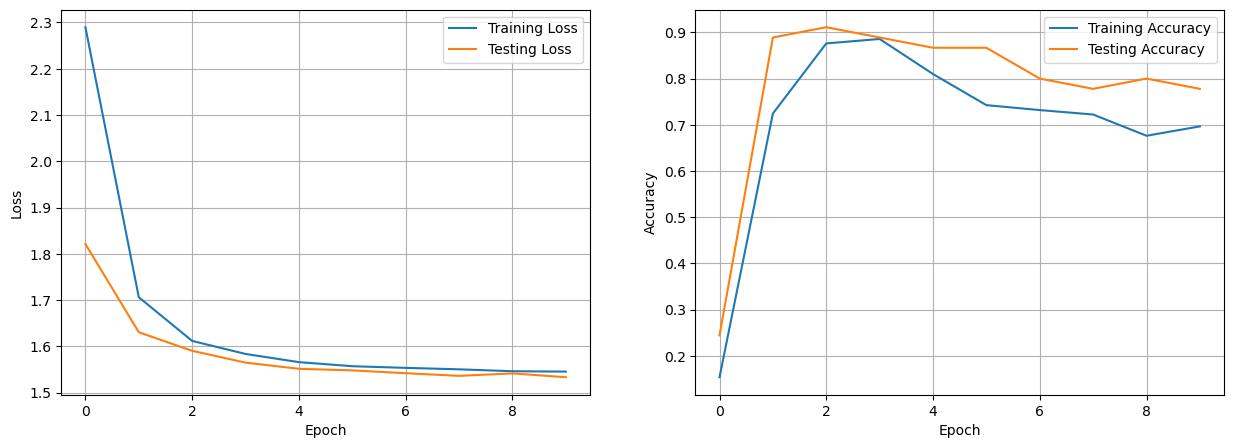

In [11]:
#plot the loss graphs
fig, ax= plt.subplots(1,2,figsize=(15,5))
ax[0].plot(model.train_loss, label = "Training Loss")
ax[0].plot(model.val_loss, label = "Testing Loss")
ax[0].legend()
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].grid()

#plot the accuracy graphs
ax[1].plot(model.train_acc, label = "Training Accuracy")
ax[1].plot(model.val_acc, label = "Testing Accuracy")
ax[1].legend()
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].grid()

## Discussion 

From the graph above, we can say that our model performs better at predicting for the testing sets rather than the training datasets. The accuracies percentages shows that the custom MLP implementation demonstrates comparable performance to the scikit-learn MLP implementation. The slight variance in the accuracy of the custom built model and scikit learn model is due varying hidden_layers, activation_functions, learning rate etc. 

## Reference 

1. Gama, Victor. Multilayer Perceptron from scratch. https://www.kaggle.com/code/vitorgamalemos/multilayer-perceptron-from-scratch

2. Multi-Layer Perceptron. https://zerowithdot.com/mlp-backpropagation/

## Code as appendix <a id ="code"></a>

In [2]:
import time
import numpy as np
import os

class MLP_Suman:
    def __init__(self, X, y, X_val, y_val, L=1, N_L = 128):
        ''' X = a numpy array 
            y : a numpy array that converts y into one- hot encoding
            X_val: a numpy array that concatenates X_val and a column of ones
            y_val: a numpy array that converts y_val into one-hot encoding
            L: an integer representing the number of hidden layers
            N_L: number of neurons in each hidden layer
            n_samples: number of samples'''
        #inpute data preprocessing
        self.X, self.X_val = map(lambda x: np.concatenate((x, np.ones((x.shape[0],1))), axis=1), (X, X_val))
        self.y, self.y_val = map(lambda y: np.squeeze(np.eye(10)[y.astype(int).reshape(-1)]), (y, y_val))
        
        #model parameters initialization
        self.L, self.N_L = L, N_L
        self.n_samples= self.X.shape[0]
        self.layer_sizes = np.array([self.X.shape[1]] + [N_L]*L + [self.y.shape[1]])
        self.__init_weights()
        
        #metrics initialization
        self.train_loss=list()
        self.train_acc=list() 
        self.val_loss=list()
        self.val_acc=list()
        self.train_time=list()
        self.metrics = [self.train_loss,self.train_acc, 
                        self.val_loss, self.val_acc,
                        self.train_time]
        
    def __sigmoid(self,z):
        # calculate the sigmoid function ( an activation function)
        return 1/ (1 + np.exp(-z))
    
    def __softmax(self,z):
        #compute the softmax along the rows of the input
        power = np.exp(z)
        return power/np.sum(power, axis=1, keepdims=True)
    
    def __loss(self, y_pred,y):
        #calculate the cross entropy loss between the predicted and actual outputs
        loss = -np.log(y_pred)*y
        avg_loss = np.mean(np.sum(loss, axis=1))
        return avg_loss
    
    def __accuracy(self, y_pred, y):
        #calculate the accuracy along the rows
        return np.all(y_pred==y, axis=1).mean()
    
    def __sigmoid_deriv(self,h):
        #calculate the derivative of sigmoid where h = sigmoid(x)
        return h * (1-h)
    
    def __to_categorical(self, X):
        #transform probabilities into categorical predictions row-wise, by simply taking the max probability
        categorical = np.zeros_like(X)
        categorical[np.arange(len(X)), X.argmax(axis=1)]=1
        return categorical
    
    def __init_weights(self):
        #initialize teh weights of the network given the sizes of the layers
        self.weights = list()
        for i in range(self.layer_sizes.shape[0]-1):
            self.weights.append(np.random.uniform(-1,1,size=[self.layer_sizes[i],self.layer_sizes[i+1]]))
        self.weights = np.asarray(self.weights, dtype=object)
        
    def __init_layers(self, batch_size):
        #initialize and allocate arrays for hidden layer activations
        self.h = [np.empty((batch_size, layer)) for layer in self.layer_sizes]
        
    def forward(self, batch):
        #perform a forward pass of 'batch' samples (N_samples x N_features)
        h_l = batch
        self.h[0]=h_l
        
        #iterate over the weights of the layers and compute the activations
        for i, weights in enumerate(self.weights):
            h_l = self.__sigmoid(h_l.dot(weights))
            self.h[i+1]=h_l
            
        #compute the output activation using softmax function
        self.out = self.__softmax(self.h[-1])
        
        
    def backward_propagation(self, batch_y):
        #update the weights using backward propagation algorithm
        
        #compute the error signal for the output layer
        delta_t = (self.out-batch_y) * self.__sigmoid_deriv(self.h[-1])
        
        #update the weights
        for i in reversed(range(len(self.weights))):
            weight_update = self.lr * (self.h[i].T.dot(delta_t)) / self.batch_size
            #apply the weight_update and compute the error
            self.weights[i] -= weight_update
            delta_t = self.__sigmoid_deriv(self.h[i])* (delta_t.dot(self.weights[i].T))
            
            
    def predict(self, X):
        #predict function to generate a categorical, one hot prediction given input X
        X = np.concatenate((X, np.ones((X.shape[0],1))), axis=1)
        self.__init_layers(X.shape[0])
        self.forward(X)
        return self.__to_categorical(self.out)
    
    def evaluate(self, X, y):
        #evaluate the accuracy predicting on X with true labels y
        predict = self.predict(X)
        return self.__accuracy(predict, y)
    
    def fit(self, batch_size=8, epochs=25, lr =1):
        #train the model with a given batch size, epochs and learning rate
        #store and print relevant matrices
        
        self.lr = lr
        self.batch_size = batch_size
        
        for epoch in range(epochs):
            start_time = time.time()
            
            #initialize the hidden layers
            self.__init_layers(self.batch_size)
            
            #shuffle the training data
            shuffle = np.random.permutation(self.n_samples)
            
            #initialize the training loss and accuracy
            train_loss=0
            train_acc=0
            
            #split the training data into batches
            X_batches= np.array_split(self.X[shuffle], self.n_samples/self.batch_size)
            y_batches= np.array_split(self.y[shuffle], self.n_samples/self.batch_size)
            
            #train the model on each batch
            for batch_x, batch_y in zip(X_batches, y_batches):
                self.forward(batch_x)
                train_loss += self.__loss(self.out, batch_y)
                train_acc += self.__accuracy(self.__to_categorical(self.out), batch_y)
                self.backward_propagation(batch_y)
                
            #calculate the average training loss and accuracy
            train_loss = train_loss / len(X_batches)
            train_acc = train_acc / len(X_batches)
            
            #store the training metrices
            self.train_loss.append(train_loss)
            self.train_acc.append(train_acc)
            train_time = round(time.time()-start_time, 3)
            self.train_time.append(train_time)
            
            #initialze the hidden layers for validation data
            self.forward(self.X_val)
            val_loss = self.__loss(self.out, self.y_val)
            val_acc = self.__accuracy(self.__to_categorical(self.out), self.y_val)
            
            #store the validation metrices
            self.val_loss.append(val_loss)
            self.val_acc.append(val_acc)
            
            #print the metrices for this epoch
            print(f"Epoch {epoch+1}: '(Training)'loss = {train_loss.round(3)}---> accuracy = {train_acc.round(3)}\
---------------->'(Testing)'val_loss ={val_loss.round(3)}--> val_accuracy = {val_acc.round(3)}--->train_time = {train_time}")
            
            
             
        

Formulas we used for calculating different sets of parameters in the above program::
   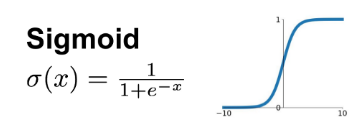
   

In [1]:
git init

SyntaxError: invalid syntax (2830201818.py, line 1)